<h1>Empirical estimation of $f$-divergences<span class="tocSkip"></span></h1>

Author: [Sylvain Combettes](https://github.com/sylvaincom).

Last update: Feb 3, 2020.

GitHub repository: [here](https://github.com/sylvaincom/comparison-distributions).

---
This notebook deals with the empirical estimation of $f$-divergences and completes my report on the _Comparison of Empirical Probability Distributions_. Three $f$-divergences are dealt with: Kullback-Leibler divergence $D_{KL}$, Helligence distance $D_H$ and Variational distance $D_V$. Contrary to IPMs (integral probability metrics) input samples drawn from the probability distributions, $f$-divergences input probability distributions.

<br/>

<div class="alert alert-info"><h4>README<span class="tocSkip"></span></h4>
    
<p> We recommend reading the report before reading this notebook, as most explanations are not duplicated here.</p>

<p>
The best way to open this Jupyter Notebook is to use the table of contents from the extensions called <code>nbextensions</code>. See <a href="https://towardsdatascience.com/4-awesome-tips-for-enhancing-jupyter-notebooks-4d8905f926c5">4 Awesome Tips for Enhancing Jupyter Notebooks</a> by George Seif.
</p>

<p>
In your current directory:
<ul>
  <li>create a <code>img</code> folder (in which the generated images will be saved)</li>
  <li>create another <code>data</code> folder in move the download the <a href="https://github.com/sylvaincom/comparison-distributions/tree/master/data">data from my GitHub</a> into it</li>
</ul>
</p>

<p>
The Python version is 3.7.3.
</p>
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#KL-divergence" data-toc-modified-id="KL-divergence-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>KL divergence</a></span><ul class="toc-item"><li><span><a href="#Defining-our-generic-function" data-toc-modified-id="Defining-our-generic-function-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Defining our generic function</a></span></li><li><span><a href="#Running-several-simulations-to-interpret-$D_{\text{KL}}$" data-toc-modified-id="Running-several-simulations-to-interpret-$D_{\text{KL}}$-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Running several simulations to interpret $D_{\text{KL}}$</a></span><ul class="toc-item"><li><span><a href="#Comparing-two-normal-distributions" data-toc-modified-id="Comparing-two-normal-distributions-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Comparing two normal distributions</a></span><ul class="toc-item"><li><span><a href="#Influence-of-the-difference-of-means-$\mu_q-\mu_p$-on-$D_\text{KL}$" data-toc-modified-id="Influence-of-the-difference-of-means-$\mu_q-\mu_p$-on-$D_\text{KL}$-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>Influence of the difference of means $\mu_q-\mu_p$ on $D_\text{KL}$</a></span></li><li><span><a href="#Influence-of-the-difference-of-standard-deviations-$\sigma_q-\sigma_p$-on-$D_\text{KL}$" data-toc-modified-id="Influence-of-the-difference-of-standard-deviations-$\sigma_q-\sigma_p$-on-$D_\text{KL}$-1.2.1.2"><span class="toc-item-num">1.2.1.2&nbsp;&nbsp;</span>Influence of the difference of standard deviations $\sigma_q-\sigma_p$ on $D_\text{KL}$</a></span></li></ul></li><li><span><a href="#Comparison-of-two-exponential-distributions" data-toc-modified-id="Comparison-of-two-exponential-distributions-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Comparison of two exponential distributions</a></span></li><li><span><a href="#Comparison-of-two-uniform-distributions" data-toc-modified-id="Comparison-of-two-uniform-distributions-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Comparison of two uniform distributions</a></span></li></ul></li></ul></li><li><span><a href="#Hellinger-distance" data-toc-modified-id="Hellinger-distance-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Hellinger distance</a></span><ul class="toc-item"><li><span><a href="#Defining-our-generic-function" data-toc-modified-id="Defining-our-generic-function-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Defining our generic function</a></span></li><li><span><a href="#Running-several-simulations-to-interpret-$D_H$" data-toc-modified-id="Running-several-simulations-to-interpret-$D_H$-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Running several simulations to interpret $D_H$</a></span><ul class="toc-item"><li><span><a href="#Comparing-two-normal-distributions" data-toc-modified-id="Comparing-two-normal-distributions-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Comparing two normal distributions</a></span><ul class="toc-item"><li><span><a href="#Influence-of-the-difference-of-means-$\mu_q-\mu_p$-on-$D_H$" data-toc-modified-id="Influence-of-the-difference-of-means-$\mu_q-\mu_p$-on-$D_H$-2.2.1.1"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>Influence of the difference of means $\mu_q-\mu_p$ on $D_H$</a></span></li><li><span><a href="#Influence-of-the-difference-of-standard-deviations-$\sigma_q-\sigma_p$-on-$D_H$" data-toc-modified-id="Influence-of-the-difference-of-standard-deviations-$\sigma_q-\sigma_p$-on-$D_H$-2.2.1.2"><span class="toc-item-num">2.2.1.2&nbsp;&nbsp;</span>Influence of the difference of standard deviations $\sigma_q-\sigma_p$ on $D_H$</a></span></li></ul></li><li><span><a href="#Comparing-two-exponential-distributions" data-toc-modified-id="Comparing-two-exponential-distributions-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Comparing two exponential distributions</a></span></li><li><span><a href="#Comparing-two-uniform-distributions" data-toc-modified-id="Comparing-two-uniform-distributions-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Comparing two uniform distributions</a></span></li></ul></li></ul></li><li><span><a href="#Variational-distance" data-toc-modified-id="Variational-distance-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Variational distance</a></span><ul class="toc-item"><li><span><a href="#Defining-our-generic-function" data-toc-modified-id="Defining-our-generic-function-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Defining our generic function</a></span></li><li><span><a href="#Running-several-simulations-to-interpret-$D_V$" data-toc-modified-id="Running-several-simulations-to-interpret-$D_V$-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Running several simulations to interpret $D_V$</a></span><ul class="toc-item"><li><span><a href="#Comparing-two-normal-distributions" data-toc-modified-id="Comparing-two-normal-distributions-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Comparing two normal distributions</a></span><ul class="toc-item"><li><span><a href="#Influence-of-the-difference-of-means-$\mu_q-\mu_p$-on-$D_V$" data-toc-modified-id="Influence-of-the-difference-of-means-$\mu_q-\mu_p$-on-$D_V$-3.2.1.1"><span class="toc-item-num">3.2.1.1&nbsp;&nbsp;</span>Influence of the difference of means $\mu_q-\mu_p$ on $D_V$</a></span></li><li><span><a href="#Influence-of-the-difference-of-standard-deviations-$\sigma_q-\sigma_p$-on-$D_V$" data-toc-modified-id="Influence-of-the-difference-of-standard-deviations-$\sigma_q-\sigma_p$-on-$D_V$-3.2.1.2"><span class="toc-item-num">3.2.1.2&nbsp;&nbsp;</span>Influence of the difference of standard deviations $\sigma_q-\sigma_p$ on $D_V$</a></span></li></ul></li><li><span><a href="#Comparing-two-exponential-distributions" data-toc-modified-id="Comparing-two-exponential-distributions-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Comparing two exponential distributions</a></span></li><li><span><a href="#Comparing-two-uniform-distributions" data-toc-modified-id="Comparing-two-uniform-distributions-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Comparing two uniform distributions</a></span></li></ul></li></ul></li><li><span><a href="#Application-of-$f$-divergences-to-the-data-generated-from-two-methods-for-computing-the-Choquet-integral" data-toc-modified-id="Application-of-$f$-divergences-to-the-data-generated-from-two-methods-for-computing-the-Choquet-integral-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Application of $f$-divergences to the data generated from two methods for computing the Choquet integral</a></span><ul class="toc-item"><li><span><a href="#For-the-Choquet-integral-of-normal-distributions" data-toc-modified-id="For-the-Choquet-integral-of-normal-distributions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>For the Choquet integral of normal distributions</a></span><ul class="toc-item"><li><span><a href="#Presenting-the-data" data-toc-modified-id="Presenting-the-data-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Presenting the data</a></span></li><li><span><a href="#Computing-the-$f$-divergences" data-toc-modified-id="Computing-the-$f$-divergences-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Computing the $f$-divergences</a></span></li></ul></li><li><span><a href="#For-the-Choquet-integral-of-exponential-distributions" data-toc-modified-id="For-the-Choquet-integral-of-exponential-distributions-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>For the Choquet integral of exponential distributions</a></span><ul class="toc-item"><li><span><a href="#Presenting-the-data" data-toc-modified-id="Presenting-the-data-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Presenting the data</a></span></li><li><span><a href="#Computing-the-$f$-divergences" data-toc-modified-id="Computing-the-$f$-divergences-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Computing the $f$-divergences</a></span></li></ul></li></ul></li></ul></div>

<h2> Imports<span class="tocSkip"></span></h2>

In [1]:
import numpy as np
from scipy.stats import norm, uniform
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import seaborn as sns
sns.set()

We configure the size of the plots:

In [2]:
plt.rcParams["figure.figsize"] = (8,6)

# KL divergence

This section is inspired from [KL Divergence Python Example](https://towardsdatascience.com/kl-divergence-python-example-b87069e4b810).

## Defining our generic function

We define our `KL_divergence` function using functions from `numpy`. We are careful with the result $\lim\limits_{x \rightarrow 0} \log(x) = -\infty$.

In [3]:
def KL_divergence(p, q):
    """
    Kullback-Leibler divergence of two (empirical) probability distributions.
    
    Parameters
    ----------
    p : numpy.ndarray
        Vector of the values of the first (discrete) probability distribution.
    q : numpy.ndarray
        Vector of the values of the second (discrete) probability distribution.
    
    Returns
    -------
    res : numpy.float64
        Result of the computation of the Kullback-Leibler divergence of p from q.
    """
    
    res = np.sum(np.where(p!=0, p*np.log(p/q), 0))
    
    return res

Does the KL divergence depend on the number of samples? Yes:

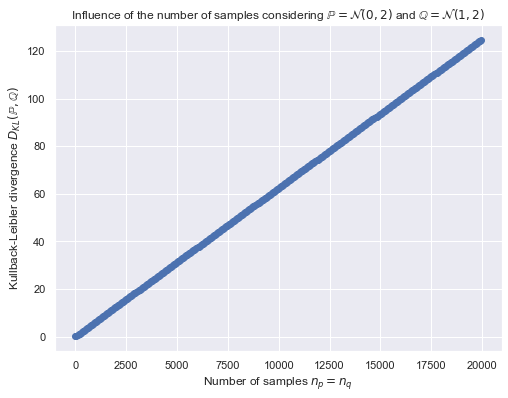

In [4]:
l_abs = np.arange(10, 20000, 50)
l_KL = []
for n in l_abs:
    x = np.linspace(-10, 10, n)
    p = norm.pdf(x, 0, 2)
    q = norm.pdf(x, 1, 2)
    l_KL.append(KL_divergence(p, q))

plt.title('Influence of the number of samples considering $\mathbb{P} = \mathcal{N}(0, 2)$ and $\mathbb{Q} = \mathcal{N}(1, 2)$')
plt.xlabel('Number of samples $n_p=n_q$')
plt.ylabel('Kullback-Leibler divergence $D_{KL}(\mathbb{P}, \mathbb{Q})$')
plt.plot(l_abs, l_KL, 'o') ;
plt.savefig('img/KL_n_1.png', dpi=120)

We should divide the KL divergence by the number of samples of one distribution in order to normalize:

In [5]:
def KL_divergence_normalized(p, q):
    """
    Kullback-Leibler divergence of two (empirical) probability distributions.
    
    Parameters
    ----------
    p : numpy.ndarray
        Vector of the values of the first (discrete) probability distribution.
    q : numpy.ndarray
        Vector of the values of the second (discrete) probability distribution.
    
    Returns
    -------
    res : numpy.float64
        Result of the computation of the Kullback-Leibler divergence of p from q.
    """
    
    res = np.sum(np.where(p!=0, p*np.log(p/q), 0))
    n = len(p)
    
    return res/n

`KL_divergence_normalized` does not depend on the number of samples:

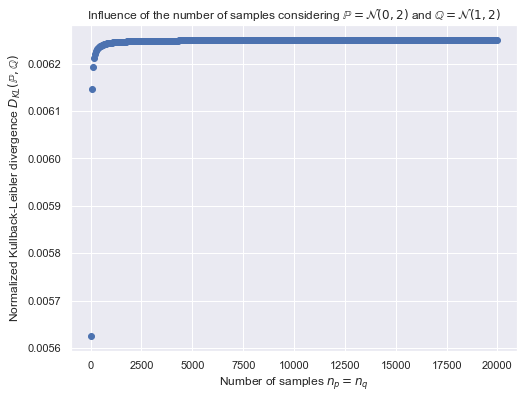

In [6]:
l_abs = np.arange(10, 20000, 50)
l_KL_normalized = []
for n in l_abs:
    x = np.linspace(-10, 10, n)
    p = norm.pdf(x, 0, 2)
    q = norm.pdf(x, 1, 2)
    l_KL_normalized.append(KL_divergence_normalized(p, q))

plt.title('Influence of the number of samples considering $\mathbb{P} = \mathcal{N}(0, 2)$ and $\mathbb{Q} = \mathcal{N}(1, 2)$')
plt.xlabel('Number of samples $n_p=n_q$')
plt.ylabel('Normalized Kullback-Leibler divergence $D_{KL}(\mathbb{P}, \mathbb{Q})$')
plt.plot(l_abs, l_KL_normalized, 'o') ;
plt.savefig('img/KL_n_2.png', dpi=120)

## Running several simulations to interpret $D_{\text{KL}}$

### Comparing two normal distributions

Here we consider two normal distributions $\mathbb{P} = \mathcal{N}(\mu_p, \sigma_p)$ and $\mathbb{Q} = \mathcal{N}(\mu_q, \sigma_q)$.

Now, we are going to plot two normal distributions using [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) and compute their KL divergence, for several values of mean and standard deviation. The goal is to see if the interpretation of the KL divergence corresponds to our intuition.

We define a plotting function:

In [7]:
def plot_normal_divergence(m_p, sd_p, m_q, sd_q, f_divergence):
    """
    Plotting two normal distributions and computing their f-divergence.
    
    Parameters
    ----------
    m_p : float
        Mean of the normal distribution p.
    sd_p : float
        Standard deviation of the normal distribution p.
    m_q : float
        Mean of the normal distribution p.
    sd_q : float
        Standard deviation distribution p.
    f_divergence : {KL_divergence, hellinger_distance, varational_distance}
        Function that computes the f-divergence we choose.
        
    Plots
    -------
    Plots (on the same figure) the two normal distributions and their f-divergence in the title.
    """
    
    x = np.arange(-10, 10, 0.001) # x-axis of our plot
    p = norm.pdf(x, m_p, sd_p) # first normal distribution of mean m_p and standard deviation sd_p
    q = norm.pdf(x, m_q, sd_q) # second normal distribution of mean m_q and standard deviation sd_q
    
    plt.title('The %s of $p$ from $q$ is %1.3f \n (with $p$ and $q$ normal distributions)'
              % (f_divergence.__name__, f_divergence(p, q)))
    plt.plot(x, p)
    plt.plot(x, q, c='red')
    txt1 = '$\mu_p = %1.1f$ and $\sigma_p = %1.0f$' % (m_p, sd_p)
    txt2 = '$\mu_q = %1.1f$ and $\sigma_q = %1.0f$' % (m_q, sd_q)
    plt.legend([txt1, txt2])
    #plt.savefig('img/KL_plot.png', dpi=120) # to save the figure
    plt.show()    

We call our plotting function:

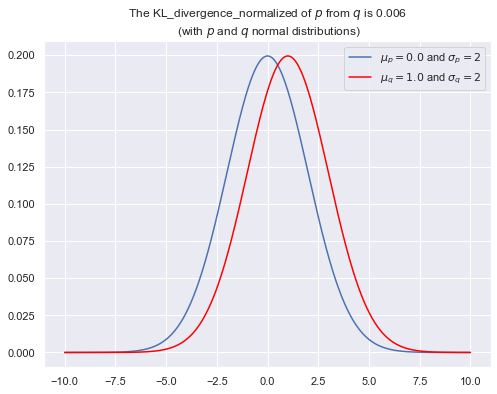

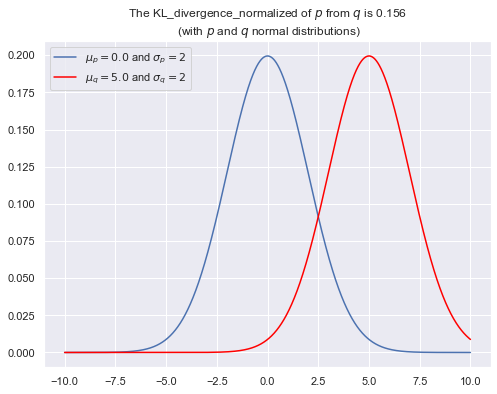

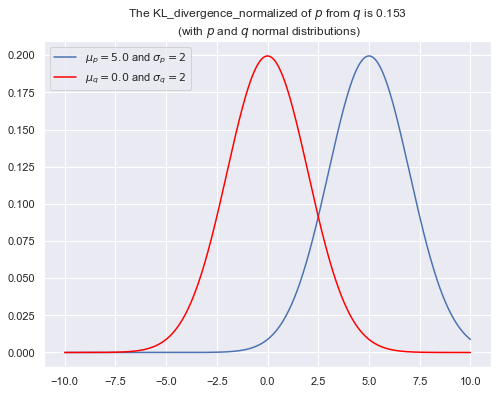

In [8]:
plot_normal_divergence(0, 2, 1, 2, KL_divergence_normalized)
plot_normal_divergence(0, 2, 5, 2, KL_divergence_normalized)
plot_normal_divergence(5, 2, 0, 2, KL_divergence_normalized)

Hence, the lower the KL divergence, the closer the two distributions are to one another.

It is important to note that the KL divergence is not symmetrical. In other words, if we switch `p` for `q` and vice versa, we get a different result.

#### Influence of the difference of means $\mu_q-\mu_p$ on $D_\text{KL}$

In [9]:
l_KL_mu = []
l_diff_mu = []

x = np.arange(-10, 10, 0.001) # x-axis of our plot

mu_p = 0
sigma_p = 2
n_p = 30 # after several simulations, 30 seems enough
p = norm.pdf(x, mu_p, sigma_p) # first normal distribution of mean m_p and standard deviation sd_p

sigma_q = 2
n_q = n_p

l_abs = np.arange(0, 20+0.01, 0.01)
for mu_q in l_abs:
    q = norm.pdf(x, mu_q, sigma_q)
    l_diff_mu.append([mu_q-mu_p])
    l_KL_mu.append([KL_divergence_normalized(p, q)])

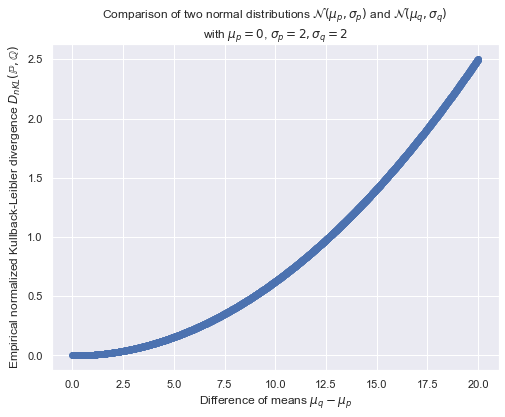

In [10]:
txt = 'Comparison of two normal distributions $\mathcal{N}(\mu_p, \sigma_p)$ and $\mathcal{N}(\mu_q, \sigma_q)$ \n'
txt = txt + 'with $\mu_p = %1.0f$, $\sigma_p = %1.0f, $' % (mu_p, sigma_p)
txt = txt + '$\sigma_q = %1.0f$' % (sigma_q)
plt.title(txt)
plt.xlabel('Difference of means $\mu_q-\mu_p$')
plt.ylabel('Empirical normalized Kullback-Leibler divergence $D_{nKL}(\mathbb{P}, \mathbb{Q})$')
plt.plot(l_diff_mu, l_KL_mu, 'o') ;
plt.savefig('img/KL_diff_mu.png', dpi=120) # to save the figure

In [11]:
reg = LinearRegression()
X = np.power(np.asarray(l_diff_mu), 2)
y = np.asarray(l_KL_mu)

reg.fit(X, y)
print('The regression score is: \n', reg.score(X, y))
print('The regression coefficients are: \n', reg.coef_)
print('The regression intercept is: \n', reg.intercept_)

The regression score is: 
 1.0
The regression coefficients are: 
 [[0.00625]]
The regression intercept is: 
 [3.4851555e-10]


The regression score is: 
 0.9997566985085691
The regression coefficients are: 
 [[0.00156517]]
The regression intercept is: 
 [0.00192111]


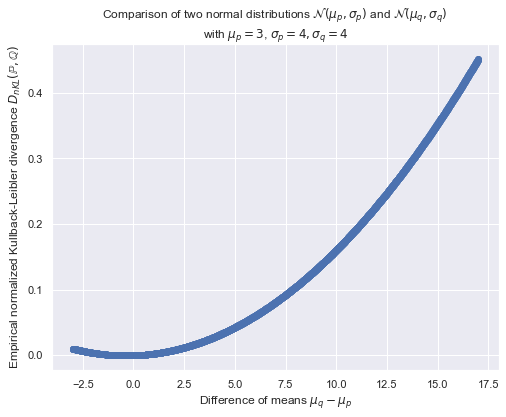

In [12]:
l_KL_mu = []
l_diff_mu = []

x = np.arange(-10, 10, 0.001) # x-axis of our plot

mu_p = 3
sigma_p = 4
n_p = 30 # after several simulations, 30 seems enough
p = norm.pdf(x, mu_p, sigma_p) # first normal distribution of mean m_p and standard deviation sd_p

sigma_q = 4
n_q = n_p

l_abs = np.arange(0, 20+0.01, 0.01)
for mu_q in l_abs:
    q = norm.pdf(x, mu_q, sigma_q)
    l_diff_mu.append([mu_q-mu_p])
    l_KL_mu.append([KL_divergence_normalized(p, q)])

txt = 'Comparison of two normal distributions $\mathcal{N}(\mu_p, \sigma_p)$ and $\mathcal{N}(\mu_q, \sigma_q)$ \n'
txt = txt + 'with $\mu_p = %1.0f$, $\sigma_p = %1.0f, $' % (mu_p, sigma_p)
txt = txt + '$\sigma_q = %1.0f$' % (sigma_q)
plt.title(txt)
plt.xlabel('Difference of means $\mu_q-\mu_p$')
plt.ylabel('Empirical normalized Kullback-Leibler divergence $D_{nKL}(\mathbb{P}, \mathbb{Q})$')
plt.plot(l_diff_mu, l_KL_mu, 'o') ;
plt.savefig('img/KL_diff_mu_2.png', dpi=120) # to save the figure

reg = LinearRegression()
X = np.power(np.asarray(l_diff_mu), 2)
y = np.asarray(l_KL_mu)

reg.fit(X, y)
print('The regression score is: \n', reg.score(X, y))
print('The regression coefficients are: \n', reg.coef_)
print('The regression intercept is: \n', reg.intercept_)

#### Influence of the difference of standard deviations $\sigma_q-\sigma_p$ on $D_\text{KL}$

The regression score is: 
 0.9902971945211431
The regression coefficients are: 
 [[0.02273969]]
The regression intercept is: 
 [-0.00952866]


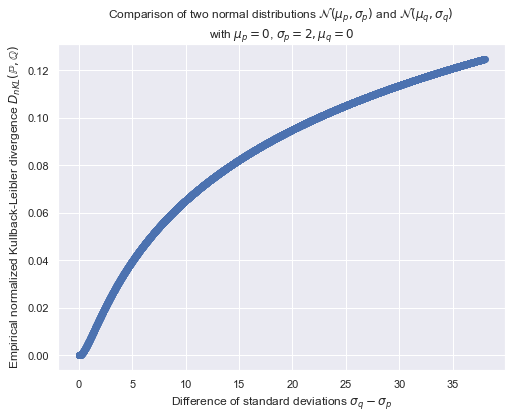

In [13]:
l_KL_sigma = []
l_diff_sigma = []

x = np.arange(-10, 10, 0.001) # x-axis of our plot

mu_p = 0
sigma_p = 2
n_p = 30 # after several simulations, 30 seems enough
p = norm.pdf(x, mu_p, sigma_p) # first normal distribution of mean m_p and standard deviation sd_p

mu_q = 0
n_q = n_p

l_abs = np.arange(2, 40, 0.01)
for sigma_q in l_abs:
    q = norm.pdf(x, mu_q, sigma_q)
    l_diff_sigma.append([sigma_q-sigma_p])
    l_KL_sigma.append([KL_divergence_normalized(p, q)])

txt = 'Comparison of two normal distributions $\mathcal{N}(\mu_p, \sigma_p)$ and $\mathcal{N}(\mu_q, \sigma_q)$ \n'
txt = txt + 'with $\mu_p = %1.0f$, $\sigma_p = %1.0f, $' % (mu_p, sigma_p)
txt = txt + '$\mu_q = %1.0f$' % (mu_q)
plt.title(txt)
plt.xlabel('Difference of standard deviations $\sigma_q-\sigma_p$')
plt.ylabel('Empirical normalized Kullback-Leibler divergence $D_{nKL}(\mathbb{P}, \mathbb{Q})$')
plt.plot(l_diff_sigma, l_KL_sigma, 'o') ;
plt.savefig('img/KL_diff_sigma.png', dpi=120) # to save the figure

reg = LinearRegression()
X = np.power(np.asarray(l_diff_sigma), 1/2)
y = np.asarray(l_KL_sigma)

reg.fit(X, y)
print('The regression score is: \n', reg.score(X, y))
print('The regression coefficients are: \n', reg.coef_)
print('The regression intercept is: \n', reg.intercept_)

### Comparison of two exponential distributions

Here we consider two exponential distributions $\mathbb{P} = \mathcal{E}(\lambda_p)$ and $\mathbb{Q} = \mathcal{E}(\lambda_q)$.

/home/swc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/home/swc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/home/swc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/home/swc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


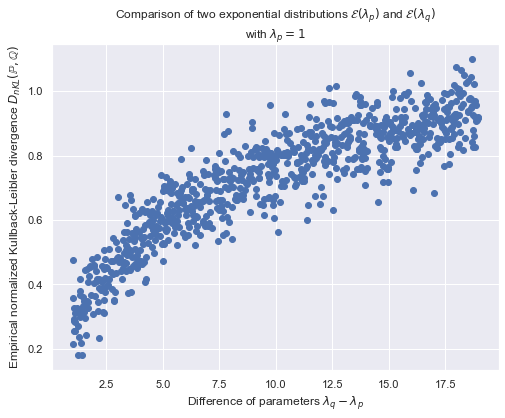

In [14]:
l_KL_lambda = []
l_diff_lambda = []

lambda_p = 1
n_p = 30 # after several simulations, 30 seems enough
np.random.seed(1)
Xp = np.random.exponential(lambda_p, n_p)
p, bin_edges = np.histogram(Xp, density=True)

n_q = n_p

l_abs = np.arange(2, 20, 0.01)
for lambda_q in l_abs:
    np.random.seed(int(lambda_q*1000)) # random seed for reproducability, different each time
    Xq = np.random.exponential(lambda_q, n_q)
    q, bin_edges = np.histogram(Xq, density=True)
    l_diff_lambda.append([lambda_q-lambda_p])
    l_KL_lambda.append([KL_divergence_normalized(p, q)])

txt = 'Comparison of two exponential distributions $\mathcal{E}(\lambda_p)$ and $\mathcal{E}(\lambda_q)$ \n'
txt = txt + 'with $\lambda_p = %1.0f$' % (lambda_p)
plt.title(txt)
plt.xlabel('Difference of parameters $\lambda_q-\lambda_p$')
plt.ylabel('Empirical normalized Kullback-Leibler divergence $D_{nKL}(\mathbb{P}, \mathbb{Q})$')
plt.plot(l_diff_lambda, l_KL_lambda, 'o') ;
plt.savefig('img/KL_diff_lambda.png', dpi=120) # to save the figure

### Comparison of two uniform distributions

Here we consider two normal distributions $\mathbb{P} = \mathbb{U}\left([a, a+h]\right)$ and $\mathbb{Q} = \mathbb{U}\left([r, r+h]\right)$ where $h$ is the length of the intervals.

Note: $a$ is called the **interval start** of $[a, a+h]$.

We use [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)'s function.

/home/swc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/home/swc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/home/swc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/home/swc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


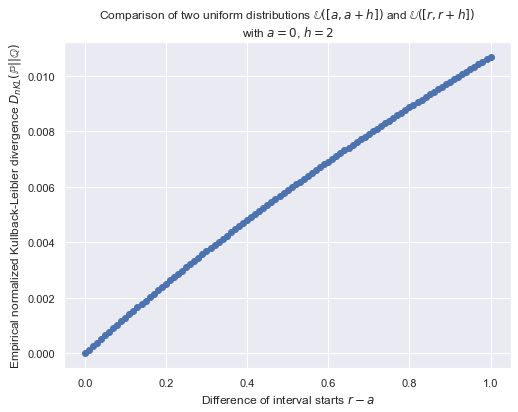

In [15]:
l_KL_unif = []
l_diff_unif = []

x = np.arange(1, 20, 0.001) # x-axis of our plot

h = 2
a = 0
sigma_p = 2
n_p = 30 # after several simulations, 30 seems enough
p = uniform.pdf(x, a, a+h) # first normal distribution of mean m_p and standard deviation sd_p

sigma_q = 2
n_q = n_p

l_abs = np.arange(0, 20, 0.01)
for r in l_abs:
    q = uniform.pdf(x, r, r+h)
    l_diff_unif.append([r-a])
    l_KL_unif.append([KL_divergence_normalized(p, q)]) # +1 so the values of p and q are strictly positive

txt = 'Comparison of two uniform distributions $\mathbb{U}([a, a+h])$ and $\mathbb{U}([r, r+h])$ \n'
txt = txt + 'with $a = %1.0f$, $h = %1.0f$' % (a, h)
plt.title(txt)
plt.xlabel('Difference of interval starts $r-a$')
plt.ylabel('Empirical normalized Kullback-Leibler divergence $D_{nKL}(\mathbb{P} || \mathbb{Q})$')
plt.plot(l_diff_unif, l_KL_unif, 'o') ;
plt.savefig('img/KL_diff_unif.png', dpi=120) # to save the figure

# Hellinger distance

## Defining our generic function

In [16]:
def hellinger_distance_normalized(p, q):
    res = np.sum((np.sqrt(p)-np.sqrt(q))**2)
    n = len(p)
    return res/n

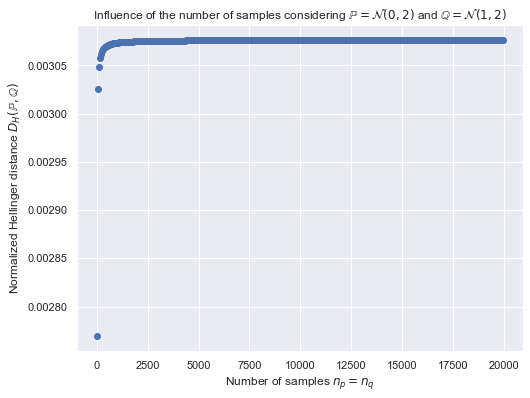

In [17]:
l_abs = np.arange(10, 20000, 50)
l_H = []
for n in l_abs:
    x = np.linspace(-10, 10, n)
    p = norm.pdf(x, 0, 2)
    q = norm.pdf(x, 1, 2)
    l_H.append(hellinger_distance_normalized(p, q))

plt.title('Influence of the number of samples considering $\mathbb{P} = \mathcal{N}(0, 2)$ and $\mathbb{Q} = \mathcal{N}(1, 2)$')
plt.xlabel('Number of samples $n_p=n_q$')
plt.ylabel('Normalized Hellinger distance $D_{H}(\mathbb{P}, \mathbb{Q})$')
plt.plot(l_abs, l_H, 'o') ;
plt.savefig('img/H_n_1.png', dpi=120)

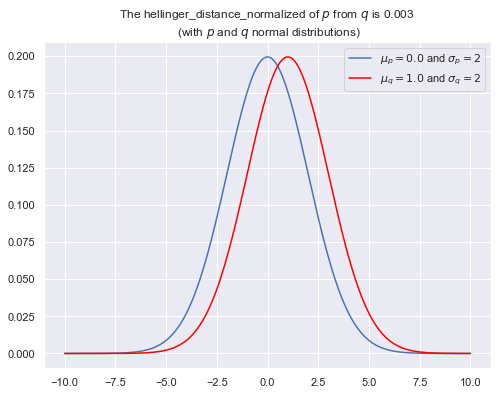

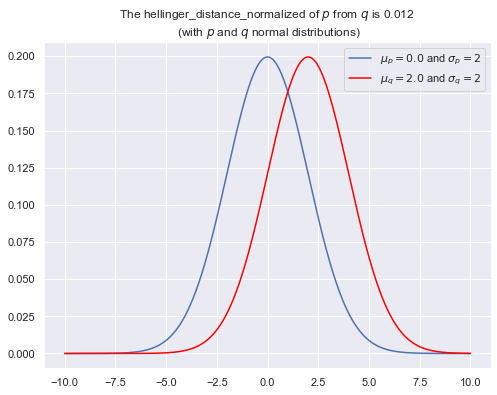

In [18]:
plot_normal_divergence(0, 2, 1, 2, hellinger_distance_normalized)
plot_normal_divergence(0, 2, 2, 2, hellinger_distance_normalized)

## Running several simulations to interpret $D_H$

### Comparing two normal distributions

Here we consider two normal distributions $\mathbb{P} = \mathcal{N}(\mu_p, \sigma_p)$ and $\mathbb{Q} = \mathcal{N}(\mu_q, \sigma_q)$.

#### Influence of the difference of means $\mu_q-\mu_p$ on $D_H$

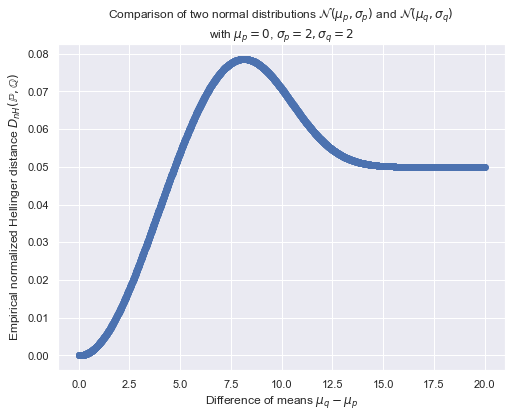

In [19]:
l_HD_mu = []
l_diff_mu = []

x = np.arange(-10, 10, 0.001) # x-axis of our plot

mu_p = 0
sigma_p = 2
n_p = 30 # after several simulations, 30 seems enough
p = norm.pdf(x, mu_p, sigma_p) # first normal distribution of mean m_p and standard deviation sd_p

sigma_q = 2
n_q = n_p

l_abs = np.arange(0, 20, 0.01)
for mu_q in l_abs:
    q = norm.pdf(x, mu_q, sigma_q)
    l_diff_mu.append([mu_q-mu_p])
    l_HD_mu.append([hellinger_distance_normalized(p, q)])

txt = 'Comparison of two normal distributions $\mathcal{N}(\mu_p, \sigma_p)$ and $\mathcal{N}(\mu_q, \sigma_q)$ \n'
txt = txt + 'with $\mu_p = %1.0f$, $\sigma_p = %1.0f, $' % (mu_p, sigma_p)
txt = txt + '$\sigma_q = %1.0f$' % (sigma_q)
plt.title(txt)
plt.xlabel('Difference of means $\mu_q-\mu_p$')
plt.ylabel('Empirical normalized Hellinger distance $D_{nH}(\mathbb{P}, \mathbb{Q})$')
plt.plot(l_diff_mu, l_HD_mu, 'o') ;
plt.savefig('img/HD_diff_mu.png', dpi=120) # to save the figure

#### Influence of the difference of standard deviations $\sigma_q-\sigma_p$ on $D_H$

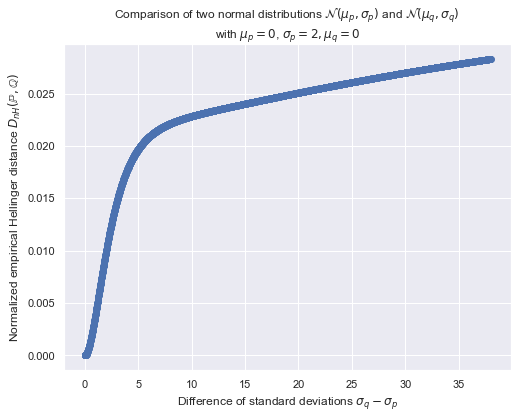

In [20]:
l_HD_sigma = []
l_diff_sigma = []

x = np.arange(-10, 10, 0.001) # x-axis of our plot

mu_p = 0
sigma_p = 2
n_p = 30 # after several simulations, 30 seems enough
p = norm.pdf(x, mu_p, sigma_p) # first normal distribution of mean m_p and standard deviation sd_p

mu_q = 0
n_q = n_p

l_abs = np.arange(2, 40, 0.01)
for sigma_q in l_abs:
    q = norm.pdf(x, mu_q, sigma_q)
    l_diff_sigma.append([sigma_q-sigma_p])
    l_HD_sigma.append([hellinger_distance_normalized(p, q)])

txt = 'Comparison of two normal distributions $\mathcal{N}(\mu_p, \sigma_p)$ and $\mathcal{N}(\mu_q, \sigma_q)$ \n'
txt = txt + 'with $\mu_p = %1.0f$, $\sigma_p = %1.0f, $' % (mu_p, sigma_p)
txt = txt + '$\mu_q = %1.0f$' % (mu_q)
plt.title(txt)
plt.xlabel('Difference of standard deviations $\sigma_q-\sigma_p$')
plt.ylabel('Normalized empirical Hellinger distance $D_{nH}(\mathbb{P}, \mathbb{Q})$')
plt.plot(l_diff_sigma, l_HD_sigma, 'o') ;
plt.savefig('img/HD_diff_sigma.png', dpi=120) # to save the figure

### Comparing two exponential distributions

Here we consider two exponential distributions $\mathbb{P} = \mathcal{E}(\lambda_p)$ and $\mathbb{Q} = \mathcal{E}(\lambda_q)$.

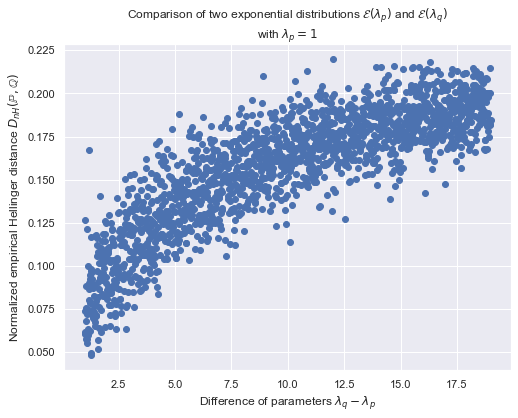

In [21]:
l_HD_lambda = []
l_diff_lambda = []

lambda_p = 1
n_p = 30 # after several simulations, 30 seems enough
np.random.seed(1)
Xp = np.random.exponential(lambda_p, n_p)
p, bin_edges = np.histogram(Xp, density=True)

n_q = n_p

l_abs = np.arange(2, 20, 0.01)
for lambda_q in l_abs:
    np.random.seed(int(lambda_q*1000)) # random seed for reproducability, different each time
    Xq = np.random.exponential(lambda_q, n_q)
    q, bin_edges = np.histogram(Xq, density=True)
    l_diff_lambda.append([lambda_q-lambda_p])
    l_HD_lambda.append([hellinger_distance_normalized(p, q)])

txt = 'Comparison of two exponential distributions $\mathcal{E}(\lambda_p)$ and $\mathcal{E}(\lambda_q)$ \n'
txt = txt + 'with $\lambda_p = %1.0f$' % (lambda_p)
plt.title(txt)
plt.xlabel('Difference of parameters $\lambda_q-\lambda_p$')
plt.ylabel('Normalized empirical Hellinger distance $D_{nH}(\mathbb{P}, \mathbb{Q})$')
plt.plot(l_diff_lambda, l_HD_lambda, 'o') ;
plt.savefig('img/HD_diff_lambda.png', dpi=120) # to save the figure

### Comparing two uniform distributions

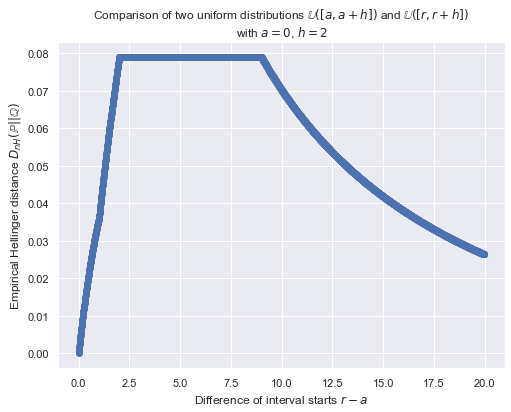

In [22]:
l_HD_unif = []
l_diff_unif = []

x = np.arange(1, 20, 0.001) # x-axis of our plot

h = 2
a = 0
sigma_p = 2
n_p = 30 # after several simulations, 30 seems enough
p = uniform.pdf(x, a, a+h) # first normal distribution of mean m_p and standard deviation sd_p

sigma_q = 2
n_q = n_p

l_abs = np.arange(0, 20, 0.01)
for r in l_abs:
    q = uniform.pdf(x, r, r+h)
    l_diff_unif.append([r-a])
    l_HD_unif.append([hellinger_distance_normalized(p, q)]) # +1 so the values of p and q are strictly positive

txt = 'Comparison of two uniform distributions $\mathbb{U}([a, a+h])$ and $\mathbb{U}([r, r+h])$ \n'
txt = txt + 'with $a = %1.0f$, $h = %1.0f$' % (a, h)
plt.title(txt)
plt.xlabel('Difference of interval starts $r-a$')
plt.ylabel('Empirical Hellinger distance $D_{nH}(\mathbb{P} || \mathbb{Q})$')
plt.plot(l_diff_unif, l_HD_unif, 'o') ;
plt.savefig('img/HD_diff_unif.png', dpi=120) # to save the figure

# Variational distance

## Defining our generic function

In [23]:
def variational_distance_normalized(p, q):
    res = np.sum(np.abs(p-q))
    n = len(p)
    return res/n

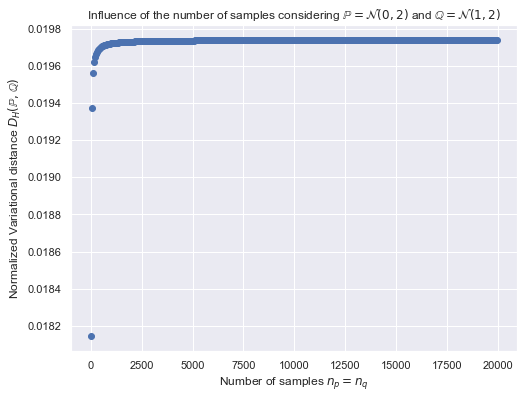

In [24]:
l_abs = np.arange(10, 20000, 50)
l_V = []
for n in l_abs:
    x = np.linspace(-10, 10, n)
    p = norm.pdf(x, 0, 2)
    q = norm.pdf(x, 1, 2)
    l_V.append(variational_distance_normalized(p, q))

plt.title('Influence of the number of samples considering $\mathbb{P} = \mathcal{N}(0, 2)$ and $\mathbb{Q} = \mathcal{N}(1, 2)$')
plt.xlabel('Number of samples $n_p=n_q$')
plt.ylabel('Normalized Variational distance $D_{H}(\mathbb{P}, \mathbb{Q})$')
plt.plot(l_abs, l_V, 'o') ;
plt.savefig('img/V_n_1.png', dpi=120)

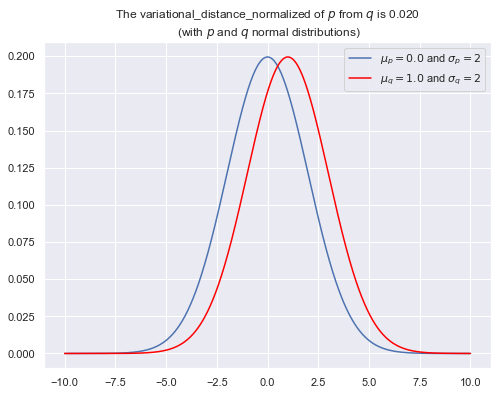

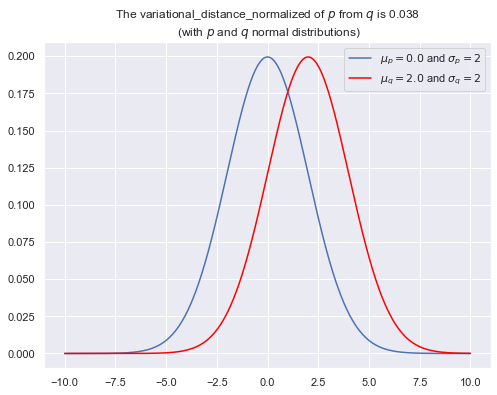

In [25]:
plot_normal_divergence(0, 2, 1, 2, variational_distance_normalized)
plot_normal_divergence(0, 2, 2, 2, variational_distance_normalized)

## Running several simulations to interpret $D_V$

### Comparing two normal distributions

Here we consider two normal distributions $\mathbb{P} = \mathcal{N}(\mu_p, \sigma_p)$ and $\mathbb{Q} = \mathcal{N}(\mu_q, \sigma_q)$.

#### Influence of the difference of means $\mu_q-\mu_p$ on $D_V$

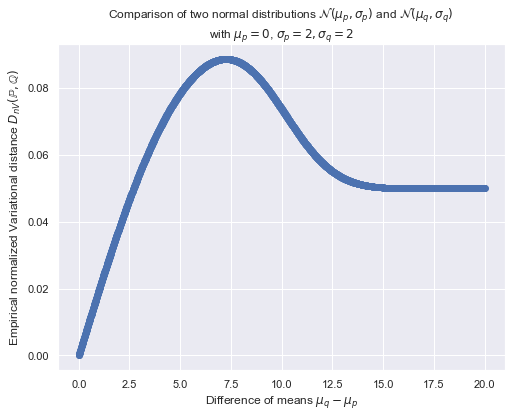

In [26]:
l_VD_mu = []
l_diff_mu = []

x = np.arange(-10, 10, 0.001) # x-axis of our plot

mu_p = 0
sigma_p = 2
n_p = 30 # after several simulations, 30 seems enough
p = norm.pdf(x, mu_p, sigma_p) # first normal distribution of mean m_p and standard deviation sd_p

sigma_q = 2
n_q = n_p

l_abs = np.arange(0, 20, 0.01)
for mu_q in l_abs:
    q = norm.pdf(x, mu_q, sigma_q)
    l_diff_mu.append([mu_q-mu_p])
    l_VD_mu.append([variational_distance_normalized(p, q)])

txt = 'Comparison of two normal distributions $\mathcal{N}(\mu_p, \sigma_p)$ and $\mathcal{N}(\mu_q, \sigma_q)$ \n'
txt = txt + 'with $\mu_p = %1.0f$, $\sigma_p = %1.0f, $' % (mu_p, sigma_p)
txt = txt + '$\sigma_q = %1.0f$' % (sigma_q)
plt.title(txt)
plt.xlabel('Difference of means $\mu_q-\mu_p$')
plt.ylabel('Empirical normalized Variational distance $D_{nV}(\mathbb{P}, \mathbb{Q})$')
plt.plot(l_diff_mu, l_VD_mu, 'o') ;
plt.savefig('img/VD_diff_mu.png', dpi=120) # to save the figure

#### Influence of the difference of standard deviations $\sigma_q-\sigma_p$ on $D_V$

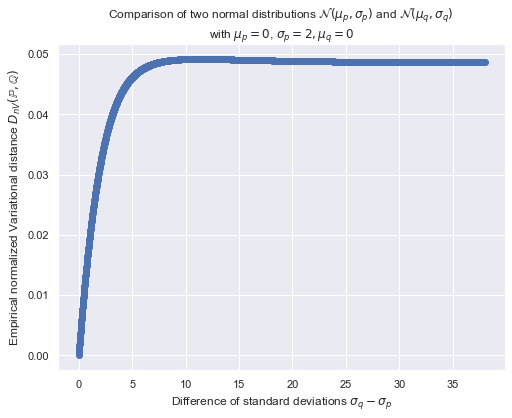

In [27]:
l_VD_sigma = []
l_diff_sigma = []

x = np.arange(-10, 10, 0.001) # x-axis of our plot

mu_p = 0
sigma_p = 2
n_p = 30 # after several simulations, 30 seems enough
p = norm.pdf(x, mu_p, sigma_p) # first normal distribution of mean m_p and standard deviation sd_p

mu_q = 0
n_q = n_p

l_abs = np.arange(2, 40, 0.01)
for sigma_q in l_abs:
    q = norm.pdf(x, mu_q, sigma_q)
    l_diff_sigma.append([sigma_q-sigma_p])
    l_VD_sigma.append([variational_distance_normalized(p, q)])

txt = 'Comparison of two normal distributions $\mathcal{N}(\mu_p, \sigma_p)$ and $\mathcal{N}(\mu_q, \sigma_q)$ \n'
txt = txt + 'with $\mu_p = %1.0f$, $\sigma_p = %1.0f, $' % (mu_p, sigma_p)
txt = txt + '$\mu_q = %1.0f$' % (mu_q)
plt.title(txt)
plt.xlabel('Difference of standard deviations $\sigma_q-\sigma_p$')
plt.ylabel('Empirical normalized Variational distance $D_{nV}(\mathbb{P}, \mathbb{Q})$')
plt.plot(l_diff_sigma, l_VD_sigma, 'o') ;
plt.savefig('img/VD_diff_sigma.png', dpi=120) # to save the figure

### Comparing two exponential distributions

Here we consider two exponential distributions $\mathbb{P} = \mathcal{E}(\lambda_p)$ and $\mathbb{Q} = \mathcal{E}(\lambda_q)$.

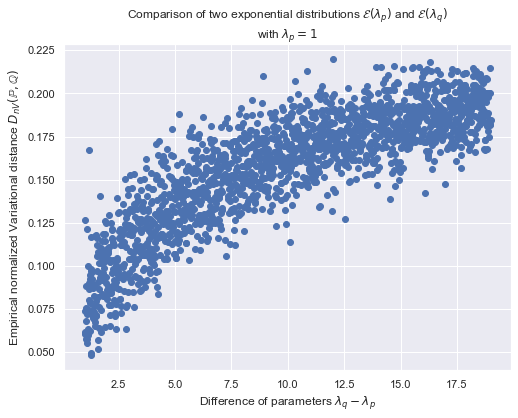

In [28]:
l_VD_lambda = []
l_diff_lambda = []

lambda_p = 1
n_p = 30 # after several simulations, 30 seems enough
np.random.seed(1)
Xp = np.random.exponential(lambda_p, n_p)
p, bin_edges = np.histogram(Xp, density=True)

n_q = n_p

l_abs = np.arange(2, 20, 0.01)
for lambda_q in l_abs:
    np.random.seed(int(lambda_q*1000)) # random seed for reproducability, different each time
    Xq = np.random.exponential(lambda_q, n_q)
    q, bin_edges = np.histogram(Xq, density=True)
    l_diff_lambda.append([lambda_q-lambda_p])
    l_VD_lambda.append([variational_distance_normalized(p, q)])

txt = 'Comparison of two exponential distributions $\mathcal{E}(\lambda_p)$ and $\mathcal{E}(\lambda_q)$ \n'
txt = txt + 'with $\lambda_p = %1.0f$' % (lambda_p)
plt.title(txt)
plt.xlabel('Difference of parameters $\lambda_q-\lambda_p$')
plt.ylabel('Empirical normalized Variational distance $D_{nV}(\mathbb{P}, \mathbb{Q})$')
plt.plot(l_diff_lambda, l_HD_lambda, 'o') ;
plt.savefig('img/VD_diff_lambda.png', dpi=120) # to save the figure

### Comparing two uniform distributions

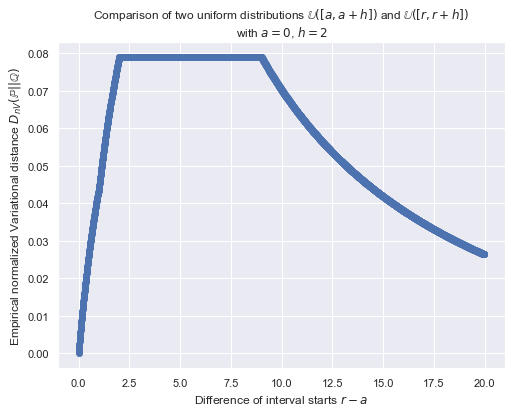

In [29]:
l_VD_unif = []
l_diff_unif = []

x = np.arange(1, 20, 0.001) # x-axis of our plot

h = 2
a = 0
sigma_p = 2
n_p = 30 # after several simulations, 30 seems enough
p = uniform.pdf(x, a, a+h) # first normal distribution of mean m_p and standard deviation sd_p

sigma_q = 2
n_q = n_p

l_abs = np.arange(0, 20, 0.01)
for r in l_abs:
    q = uniform.pdf(x, r, r+h)
    l_diff_unif.append([r-a])
    l_VD_unif.append([variational_distance_normalized(p, q)]) # +1 so the values of p and q are strictly positive

txt = 'Comparison of two uniform distributions $\mathbb{U}([a, a+h])$ and $\mathbb{U}([r, r+h])$ \n'
txt = txt + 'with $a = %1.0f$, $h = %1.0f$' % (a, h)
plt.title(txt)
plt.xlabel('Difference of interval starts $r-a$')
plt.ylabel('Empirical normalized Variational distance $D_{nV}(\mathbb{P} || \mathbb{Q})$')
plt.plot(l_diff_unif, l_VD_unif, 'o') ;
plt.savefig('img/VD_diff_unif.png', dpi=120) # to save the figure

# Application of $f$-divergences to the data generated from two methods for computing the Choquet integral

## For the Choquet integral of normal distributions

### Presenting the data

61
61


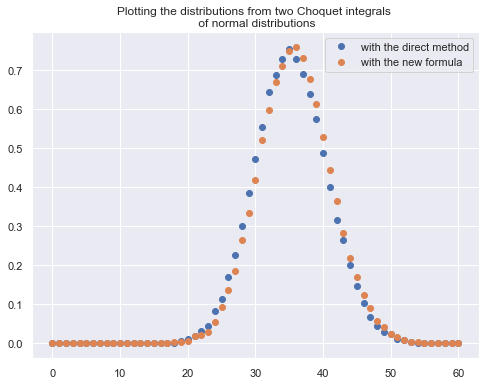

In [30]:
P1_df = pd.read_csv('data/P1_normal.csv', sep=',', header=None)
P2_df = pd.read_csv('data/P2_normal.csv', sep=',', header=None)

P1_array = P1_df.values[0]
P2_array = P2_df.values[0]

P1_list = P1_df.values.tolist()[0]
P2_list = P2_df.values.tolist()[0]

print(len(P1_list))
print(len(P2_list))

plt.title('Plotting the distributions from two Choquet integrals \n of normal distributions') ;
plt.plot(P1_list, 'o') ;
plt.plot(P2_list, 'o') ;
plt.legend(['with the direct method', 'with the new formula']) ;
plt.savefig('img/choquet_normal_P.png', dpi=120) # to save the figure

### Computing the $f$-divergences

In [31]:
KL_divergence_normalized(P1_array, P2_array)

/home/swc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/home/swc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/home/swc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/home/swc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


inf

In [32]:
hellinger_distance_normalized(P1_array, P2_array)

0.0005179172799343606

In [33]:
variational_distance_normalized(P1_array, P2_array)

0.013813114754098365

Does the 0 values change the computation ? Yes, because of the normalization. Indeed:

In [34]:
test1 = np.array([0, 0, 0, 0, 10, 20, 30, 40, 50, 60, 70, 70, 80])
test2 = np.array([0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 7, 8])
KL_divergence_normalized(test1, test2)

/home/swc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


76.16242999903383

In [35]:
test1 = np.array([10, 20, 30, 40, 50, 60, 70, 70, 80])
test2 = np.array([1, 2, 3, 4, 5, 6, 7, 7, 8])
KL_divergence_normalized(test1, test2)

110.0123988874933

## For the Choquet integral of exponential distributions

### Presenting the data

51
51


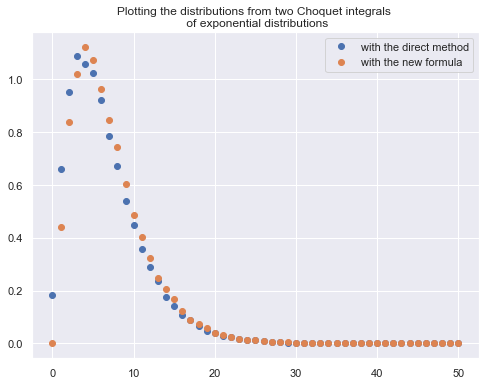

In [36]:
P1_df = pd.read_csv('data/P1_exp.csv', sep=',', header=None)
P2_df = pd.read_csv('data/P2_exp.csv', sep=',', header=None)

P1_array = P1_df.values[0]
P2_array = P2_df.values[0]

P1_list = P1_df.values.tolist()[0]
P2_list = P2_df.values.tolist()[0]

print(len(P1_list))
print(len(P2_list))

plt.title('Plotting the distributions from two Choquet integrals \n of exponential distributions') ;
plt.plot(P1_list, 'o') ;
plt.plot(P2_list, 'o') ;
plt.legend(['with the direct method', 'with the new formula']) ;
plt.savefig('img/choquet_exp_P.png', dpi=120) # to save the figure

### Computing the $f$-divergences

In [37]:
KL_divergence_normalized(P1_array, P2_array)

/home/swc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/home/swc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/home/swc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/home/swc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


inf

In [38]:
hellinger_distance_normalized(P1_array, P2_array)

0.004391423572662732

In [39]:
variational_distance_normalized(P1_array, P2_array)

0.02294509803921568